In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"Not Verified | Boarded on time, but it took a..."
1,"✅ Trip Verified | 5 days before the flight, w..."
2,Not Verified | \r\nWe traveled to Lisbon for ...
3,✅ Trip Verified | Booked a flight from Buchar...
4,✅ Trip Verified | Booked online months ago an...


In [4]:
df

,reviews
0,"Not Verified | Boarded on time, but it took a..."
1,"✅ Trip Verified | 5 days before the flight, w..."
2,Not Verified | \r\nWe traveled to Lisbon for ...
3,✅ Trip Verified | Booked a flight from Buchar...
4,✅ Trip Verified | Booked online months ago an...
...,...
995,✅ Trip Verified | Barcelona to New York via L...
996,✅ Trip Verified | Gatwick to Fort Lauderdale....
997,✅ Trip Verified | We recently flew from Londo...
998,✅ Trip Verified | \r\nVenice to London City. ...


In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [6]:
df

,reviews
0,"Boarded on time, but it took ages to get to ..."
1,"5 days before the flight, we were advised by..."
2,\r\nWe traveled to Lisbon for our dream vaca...
3,Booked a flight from Bucharest to Manchester...
4,Booked online months ago and the only hitch ...
...,...
995,Barcelona to New York via London. I was in B...
996,Gatwick to Fort Lauderdale. Charging to choo...
997,"We recently flew from London to Bologna, the..."
998,\r\nVenice to London City. Really we had a g...


In [7]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...
1,"5 days before the flight, we were advised by...",days before the flight we were advised by BA ...
2,\r\nWe traveled to Lisbon for our dream vaca...,We traveled to Lisbon for our dream vacation ...
3,Booked a flight from Bucharest to Manchester...,Booked a flight from Bucharest to Manchester ...
4,Booked online months ago and the only hitch ...,Booked online months ago and the only hitch w...


In [8]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...,"[(Boarded, v), (time, n), (took, v), (ages, n)..."
1,"5 days before the flight, we were advised by...",days before the flight we were advised by BA ...,"[(days, n), (flight, n), (advised, v), (BA, n)..."
2,\r\nWe traveled to Lisbon for our dream vaca...,We traveled to Lisbon for our dream vacation ...,"[(traveled, v), (Lisbon, n), (dream, n), (vaca..."
3,Booked a flight from Bucharest to Manchester...,Booked a flight from Bucharest to Manchester ...,"[(Booked, v), (flight, n), (Bucharest, n), (Ma..."
4,Booked online months ago and the only hitch ...,Booked online months ago and the only hitch w...,"[(Booked, v), (online, a), (months, n), (ago, ..."


In [10]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...,"[(Boarded, v), (time, n), (took, v), (ages, n)...",Boarded time take age get runway due congest...
1,"5 days before the flight, we were advised by...",days before the flight we were advised by BA ...,"[(days, n), (flight, n), (advised, v), (BA, n)...",day flight advise BA cancel ask us rebook fl...
2,\r\nWe traveled to Lisbon for our dream vaca...,We traveled to Lisbon for our dream vacation ...,"[(traveled, v), (Lisbon, n), (dream, n), (vaca...",travel Lisbon dream vacation cruise Portugal...
3,Booked a flight from Bucharest to Manchester...,Booked a flight from Bucharest to Manchester ...,"[(Booked, v), (flight, n), (Bucharest, n), (Ma...",Booked flight Bucharest Manchester h layover...
4,Booked online months ago and the only hitch ...,Booked online months ago and the only hitch w...,"[(Booked, v), (online, a), (months, n), (ago, ...",Booked online month ago hitch replacement ai...


In [11]:
df[['reviews','Lemma']]

,reviews,Lemma
0,"Boarded on time, but it took ages to get to ...",Boarded time take age get runway due congest...
1,"5 days before the flight, we were advised by...",day flight advise BA cancel ask us rebook fl...
2,\r\nWe traveled to Lisbon for our dream vaca...,travel Lisbon dream vacation cruise Portugal...
3,Booked a flight from Bucharest to Manchester...,Booked flight Bucharest Manchester h layover...
4,Booked online months ago and the only hitch ...,Booked online month ago hitch replacement ai...
...,...,...
995,Barcelona to New York via London. I was in B...,Barcelona New York via London Barcelona four...
996,Gatwick to Fort Lauderdale. Charging to choo...,Gatwick Fort Lauderdale Charging choose seat...
997,"We recently flew from London to Bologna, the...",recently fly London Bologna aircraft full re...
998,\r\nVenice to London City. Really we had a g...,Venice London City Really great experience B...


In [12]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...,"[(Boarded, v), (time, n), (took, v), (ages, n)...",Boarded time take age get runway due congest...,0.4404,Neutral
1,"5 days before the flight, we were advised by...",days before the flight we were advised by BA ...,"[(days, n), (flight, n), (advised, v), (BA, n)...",day flight advise BA cancel ask us rebook fl...,-0.3167,Negative
2,\r\nWe traveled to Lisbon for our dream vaca...,We traveled to Lisbon for our dream vacation ...,"[(traveled, v), (Lisbon, n), (dream, n), (vaca...",travel Lisbon dream vacation cruise Portugal...,0.8020,Positive
3,Booked a flight from Bucharest to Manchester...,Booked a flight from Bucharest to Manchester ...,"[(Booked, v), (flight, n), (Bucharest, n), (Ma...",Booked flight Bucharest Manchester h layover...,-0.9451,Negative
4,Booked online months ago and the only hitch ...,Booked online months ago and the only hitch w...,"[(Booked, v), (online, a), (months, n), (ago, ...",Booked online month ago hitch replacement ai...,0.1779,Neutral


In [14]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    480
Negative    412
Neutral     108
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7802781465f0>,
 [Text(0.0690696084852792, 1.0978293989430645, 'Positive'),
  Text(-0.4305111002419281, -1.0122550037260791, 'Negative'),
  Text(1.2730371984675077, -0.44930645590509777, 'Neutral')],
 [Text(0.03767433190106138, 0.598816035787126, '48.0%'),
  Text(-0.23482423649559714, -0.5521390929414977, '41.2%'),
  Text(0.8015419397758381, -0.2828966574217282, '10.8%')])

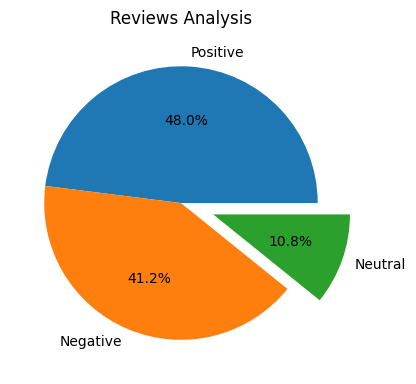

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [16]:
df.to_csv("BA_reviews.csv")

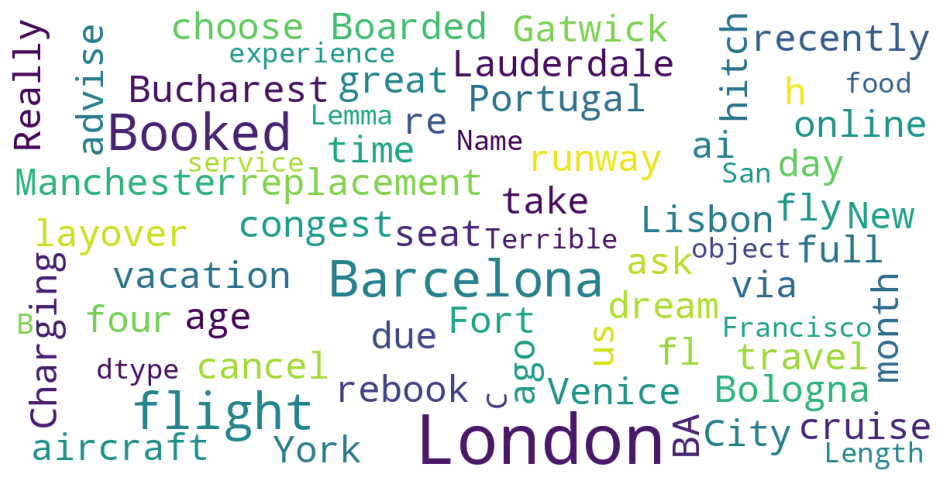

In [17]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)